# How are they tweeting about it ?

As wish to my mother country, I just wanted to see how guys there are fond of tweeter and used to tweet about Independance Day on Tweeter.

There are a lot of modules that can handle api connection to Twitter, but we'll use as example Tweepy.
So let's suppose we already had a tweeter account and all credentials necessary to api use. Then we will load and authenticate as followed:

In [1]:
import json
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

In [2]:
import tweepy

# Authentication
auth = tweepy.OAuthHandler(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])
auth.set_access_token(creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])

In [3]:
# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True,
    wait_on_rate_limit_notify=True)

In [4]:
import pandas as pd

In [5]:
#check for 1 week number of tweets with #229 or BENIN
msgs = []
msg =[]

for tweet in tweepy.Cursor(api.search, q='#229 OR BENIN', lang = 'fr', since="2019-07-30", until="2019-08-02").items():
    msg = [tweet.text, tweet.source, tweet.source_url, tweet.created_at] 
    msg = tuple(msg)                    
    msgs.append(msg)

df = pd.DataFrame(msgs, columns=['text', 'source', 'url', 'created_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

Rate limit reached. Sleeping for: 342
Rate limit reached. Sleeping for: 577


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 4 columns):
text          2813 non-null object
source        2813 non-null object
url           2813 non-null object
created_at    2813 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 88.0+ KB


In [39]:
from datetime import datetime as dt
df['date'] = df.created_at.dt.date

Let's plot by date and see what we have:

In [40]:
df['date'].value_counts()

2019-08-01    1018
2019-07-31     945
2019-07-30     850
Name: date, dtype: int64

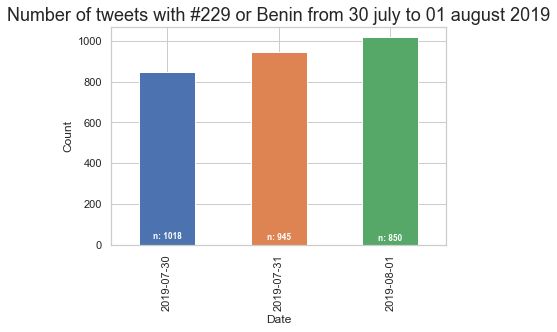

In [47]:
#plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
ax = df.groupby(df["created_at"].dt.date)['text'].count().plot(kind="bar")
medians = df.groupby(['date'])['text'].value_counts().values

#number of observations
obs = df['date'].value_counts().values
obs = [str(x) for x in obs.tolist()]
obs = ["n: " + i for i in obs]
pos = range(len(nobs))
plt.title('Number of tweets with #229 or Benin from 30 july to 01 august 2019', fontsize = 18)
plt.xlabel('Date')
plt.ylabel('Count')

#put it on tick
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

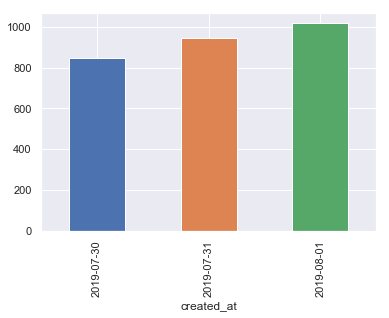

So we just notice since 30 july an increase in tweets related to #229 and Benin.

Happy Independance day !

credits to : 
https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
https://stackoverflow.com/questions/44948628/how-to-take-all-tweets-in-a-hashtag-with-tweepy/44949169#44949169